In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path =r'C:\Users\aramaiah.ASUAD\Naresh_IT\MyDataScience\Data_Files\Visadataset.csv'
visa_df=pd.read_csv(path)
visa_df.head(6)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified


$CATEGORICAL$ vs $CATEGORICAL$

In [ ]:
# CONTINENT a applicats
# Case_status
# as we know that there are 25480 observations are there
# in that 16k are from asia applicats
# out of 16k applicants how many visa approved 
# out of 1k how mnay visa rejected


In [15]:
c1=visa_df['continent']=='Asia'
c2=visa_df['case_status']=='Certified'
c3=visa_df['case_status']=='Denied'
c4=visa_df['continent'].unique()
con1 = c1&c2
con2 = c1&c3
Certified_visa_count1=len(visa_df[con1])
Denied_visa_count2=len(visa_df[con2])
print(f'There are {Certified_visa_count1} got certified from Asia')
print(f'There are {Denied_visa_count2} got denied from Asia')
c4

There are 11012 got certified from Asia
There are 5849 got denied from Asia


array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [ ]:
     Denied  Certified
Asia v1        v2
Europe v1      v2

In [23]:
# Step1 : make unique label
labels=visa_df['continent'].unique()
# Step-2 : create empty two lists
Certified_visa_count1=[]
Denied_visa_count2=[]
# Step-3 : iterate through the loop 
for i in labels:
    c1=visa_df['continent']==i
    c2=visa_df['case_status']=='Certified'
    c3=visa_df['case_status']=='Denied'
    cert_con=c1&c2
    den_con =c1&c3
    
    Certified_visa_count1.append(len(visa_df[cert_con]))
    Denied_visa_count2.append(len(visa_df[den_con]))
    
Certified_visa_count1,Denied_visa_count2
cols=['Continent','Certified','Denied']
d1=pd.DataFrame(zip(labels,Certified_visa_count1,Denied_visa_count2),columns=cols)

d1


,Continent,Certified,Denied
0,Asia,11012,5849
1,Africa,397,154
2,North America,2037,1255
3,Europe,2957,775
4,South America,493,359
5,Oceania,122,70


In [24]:
d1.set_index('Continent')

,Certified,Denied
Continent,,
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**pd.crosstab**
- will take two aguments 
- one being index
- another being column

In [30]:
col1=visa_df['continent']
col2=visa_df['case_status']
res1=pd.crosstab(col1,col2)
res1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [29]:
# in order to understand coulmn 1 and coumn 2
col1=[visa_df['continent'],visa_df['education_of_employee']]
col2=visa_df['case_status']
res2=pd.crosstab(col1,col2)
res2

case_status                          Certified  Denied
continent     education_of_employee                   
Africa        Bachelor's                    81      62
              Doctorate                     43      11
              High School                   23      43
              Master's                     250      38
Asia          Bachelor's                  4407    2761
              Doctorate                    780     143
              High School                  676    1614
              Master's                    5149    1331
Europe        Bachelor's                  1040     259
              Doctorate                    788      58
              High School                  162     328
              Master's                     967     130
North America Bachelor's                   641     584
              Doctorate                    207      51
              High School                  210     191
              Master's                     979     429
Oceania       Bachelor's                    38      28
              Doctorate                     19       3
              High School                   19      17
              Master's                      46      22
South America Bachelor's                   160     173
              Doctorate                     75      14
              High School                   74      63
              Master's                     184     109

AttributeError: 'DataFrame' object has no attribute 'show'

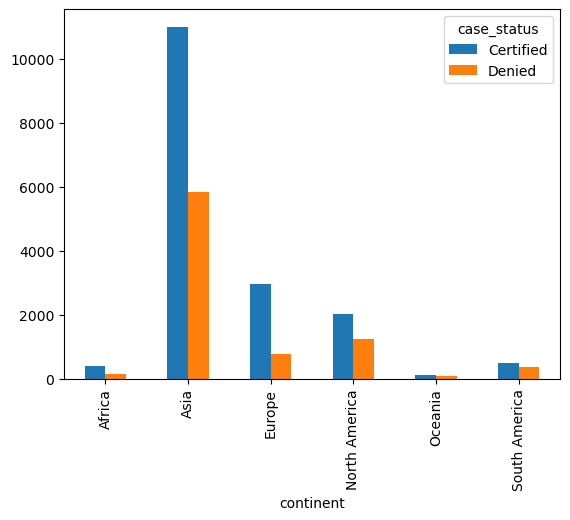

In [35]:
res1.plot(kind='bar')
res1.show()

<Axes: xlabel='continent,education_of_employee'>

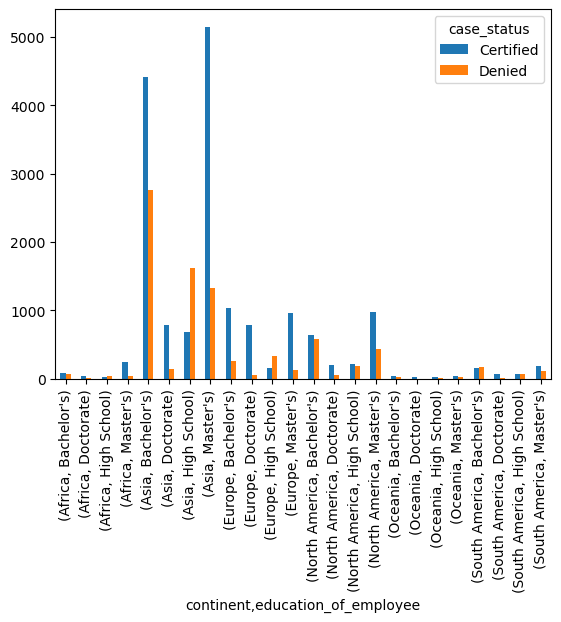

In [36]:
res2.plot(kind='bar')

<Axes: xlabel='continent'>

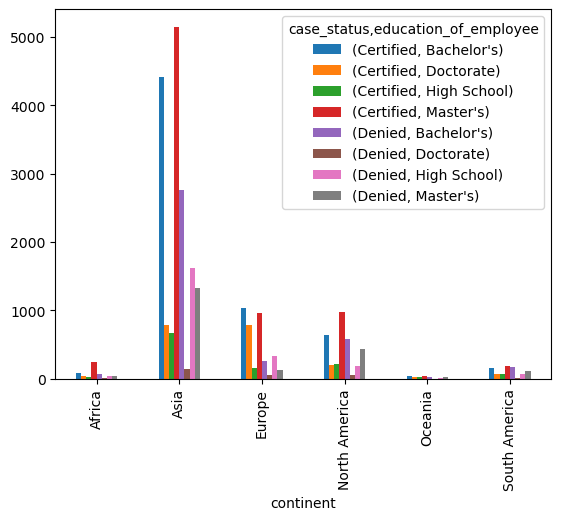

In [37]:
col1=visa_df['continent']
col2=visa_df['case_status']
col3=visa_df['education_of_employee']
r1=pd.crosstab(col1,[col2,col3])
r1.plot(kind='bar')